In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sqrt(x):                 #Square roots generating function(Babylonian Method)
    n = 1
    for _ in range(100):
        n = (n + x/n) * 0.5
    return n

Compund annual growth rate $= (\frac{V_{t}}{V_{0}})^{\frac{1}{t}} - 1 $ 

In [3]:
#reading .csv file using pandas library
df= pd.read_csv("Apple.csv")
df=pd.DataFrame(df) #converting date into dataframe
n_trade = 252 #total number of trading days in a year.
total_growth = (df['Open'].iloc[-1] / df['Close'][1])#compute total_growth over years
#growth rate per year
growth_rate = total_growth**(1/((df.index[-1] - df.index[0]) / n_trade)) - 1 
#daily price changes
std_dev = df['Adj Close'].pct_change().std()
std_dev = std_dev * sqrt(n_trade) #time adjusted standard deviation
print ("growth_rate (returns): ", str(round(growth_rate,2)))
print ("std_dev (volatility of return:)", str(round(std_dev,2)))

growth_rate (returns):  0.19
std_dev (volatility of return:) 0.45


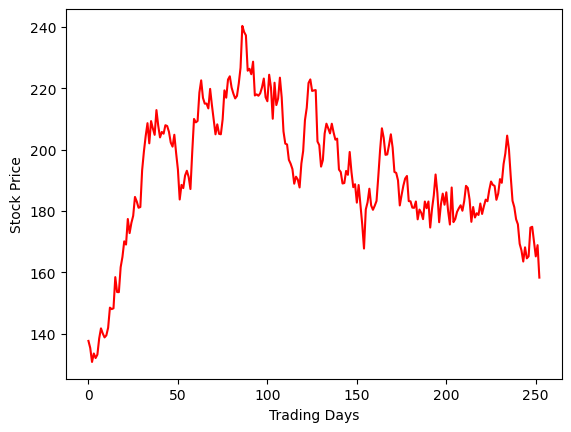

In [4]:
#Normal distributions generating daily returns 
mu = growth_rate/n_trade
sigma = std_dev/sqrt(n_trade)
return_percents_per_day = np.random.normal(mu, sigma, n_trade)
#Use of random walk
prices =  [df['Adj Close'].iloc[-1]]

for j in return_percents_per_day:
    prices.append(prices[-1]*(1+j))
plt.plot(prices, color ='r') #Stock prices plot using generated data
plt.xlabel("Trading Days")
plt.ylabel("Stock Price")
plt.show()

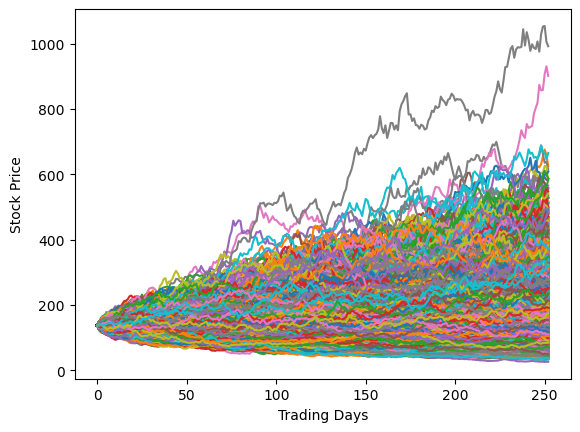

Predicted price of Apple stock:  165.35


In [5]:
closing_prices = [] #generating empty list which will store closing price values
i=0
while i < 10000: # 10000 to get monte carlo simulations
    return_percents_per_day = np.random.normal(mu, sigma, n_trade)
    prices = [df['Adj Close'].iloc[-1]]
    for j in return_percents_per_day:
        prices.append(prices[-1]*(1+j))
    closing_prices.append(prices[-1])
    plt.plot(prices)
    i = i+1
plt.xlabel("Trading Days")
plt.ylabel("Stock Price")
plt.show()
print("Predicted price of Apple stock: ", str(round(np.mean(closing_prices),2)))